# Prelims

Before running this notebook, run:
```bash
mkdir -p ~/dumps
cd ~/dumps
python -m adapter_covid19.example basic
python -m adapter_covid19.example no_lockdown
python -m adapter_covid19.example slow_unlock
python -m adapter_covid19.example slow_unlock_constrained
```

Warning: the above takes 10GB of RAM

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import pickle
import glob

In [3]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm

In [4]:
# SET THESE!
data_path = '~/dumps'
start_date = pd.to_datetime("2020-03-13") # date when simulation starts, i.e. time == 0
assert len(data_path) > 0, "Set data path!"

In [5]:
%matplotlib inline

In [6]:
from adapter_covid19.simulator import *
from adapter_covid19.scenarios import *
from adapter_covid19.metrics import *

In [7]:
import matplotlib
matplotlib.rc('font', size=18)

# Multiple Scenarios

In [8]:
scenario_files = [
    os.path.join(data_path,f"{x}.pkl")
    for x in [
        'scenario_no_lockdown', 'scenario_basic', 'scenario_slow_unlock', 'scenario_slow_unlock_constrained'
    ]]

In [9]:
summary_dfs = {}

In [10]:
def load_scenario(scenario_file):
    global summary_dfs
    try:
        with open(scenario_file,"rb") as f:
            name,scenario,(econ,states) = pickle.load(f)
        summary_dfs[name] = summarize_one_scenario(econ,states,end_time=scenario.simulation_end_time,start_date=start_date)
        del states
    except:
        print(f"error loading {scenario_file}")

In [11]:
for scenario_file in tqdm(scenario_files):
    load_scenario(scenario_file)

100%|██████████| 4/4 [07:42<00:00, 115.57s/it]


In [12]:
metrics_scenarios(summary_dfs)

no_lockdown     basic  \
Metric                                  Period                          
Total GDP                               Q2         0.896866  0.601399   
                                        Q3         0.935350  0.758339   
Household Expenditure Reduction (Total) Q2         0.151838  0.177783   
                                        Q3         0.095622  0.226857   
Capital Stock                           Q2         0.998640  0.913347   
                                        Q3         0.989957  0.889045   
Unemployed                              Q2         0.069667  0.136855   
                                        Q3         0.059493  0.176587   
Furloughed                              Q2         0.000000  0.139908   
                                        Q3         0.000000  0.043957   

                                                slow_unlock  \
Metric                                  Period                
Total GDP                               Q2         0.409608   
                                        Q3         0.577195   
Household Expenditure Reduction (Total) Q2         0.229172   
                                        Q3         0.245691   
Capital Stock                           Q2         0.890285   
                                        Q3         0.807413   
Unemployed                              Q2         0.175911   
                                        Q3         0.317863   
Furloughed                              Q2         0.119926   
                                        Q3         0.000883   

                                                slow_unlock_constrained  
Metric                                  Period                           
Total GDP                               Q2                     0.396457  
                                        Q3                     0.562504  
Household Expenditure Reduction (Total) Q2                     0.229309  
                                        Q3                     0.242088  
Capital Stock                           Q2                     0.888448  
                                        Q3                     0.799718  
Unemployed                              Q2                     0.172605  
                                        Q3                     0.309195  
Furloughed                              Q2                     0.147450  
                                        Q3                     0.026069

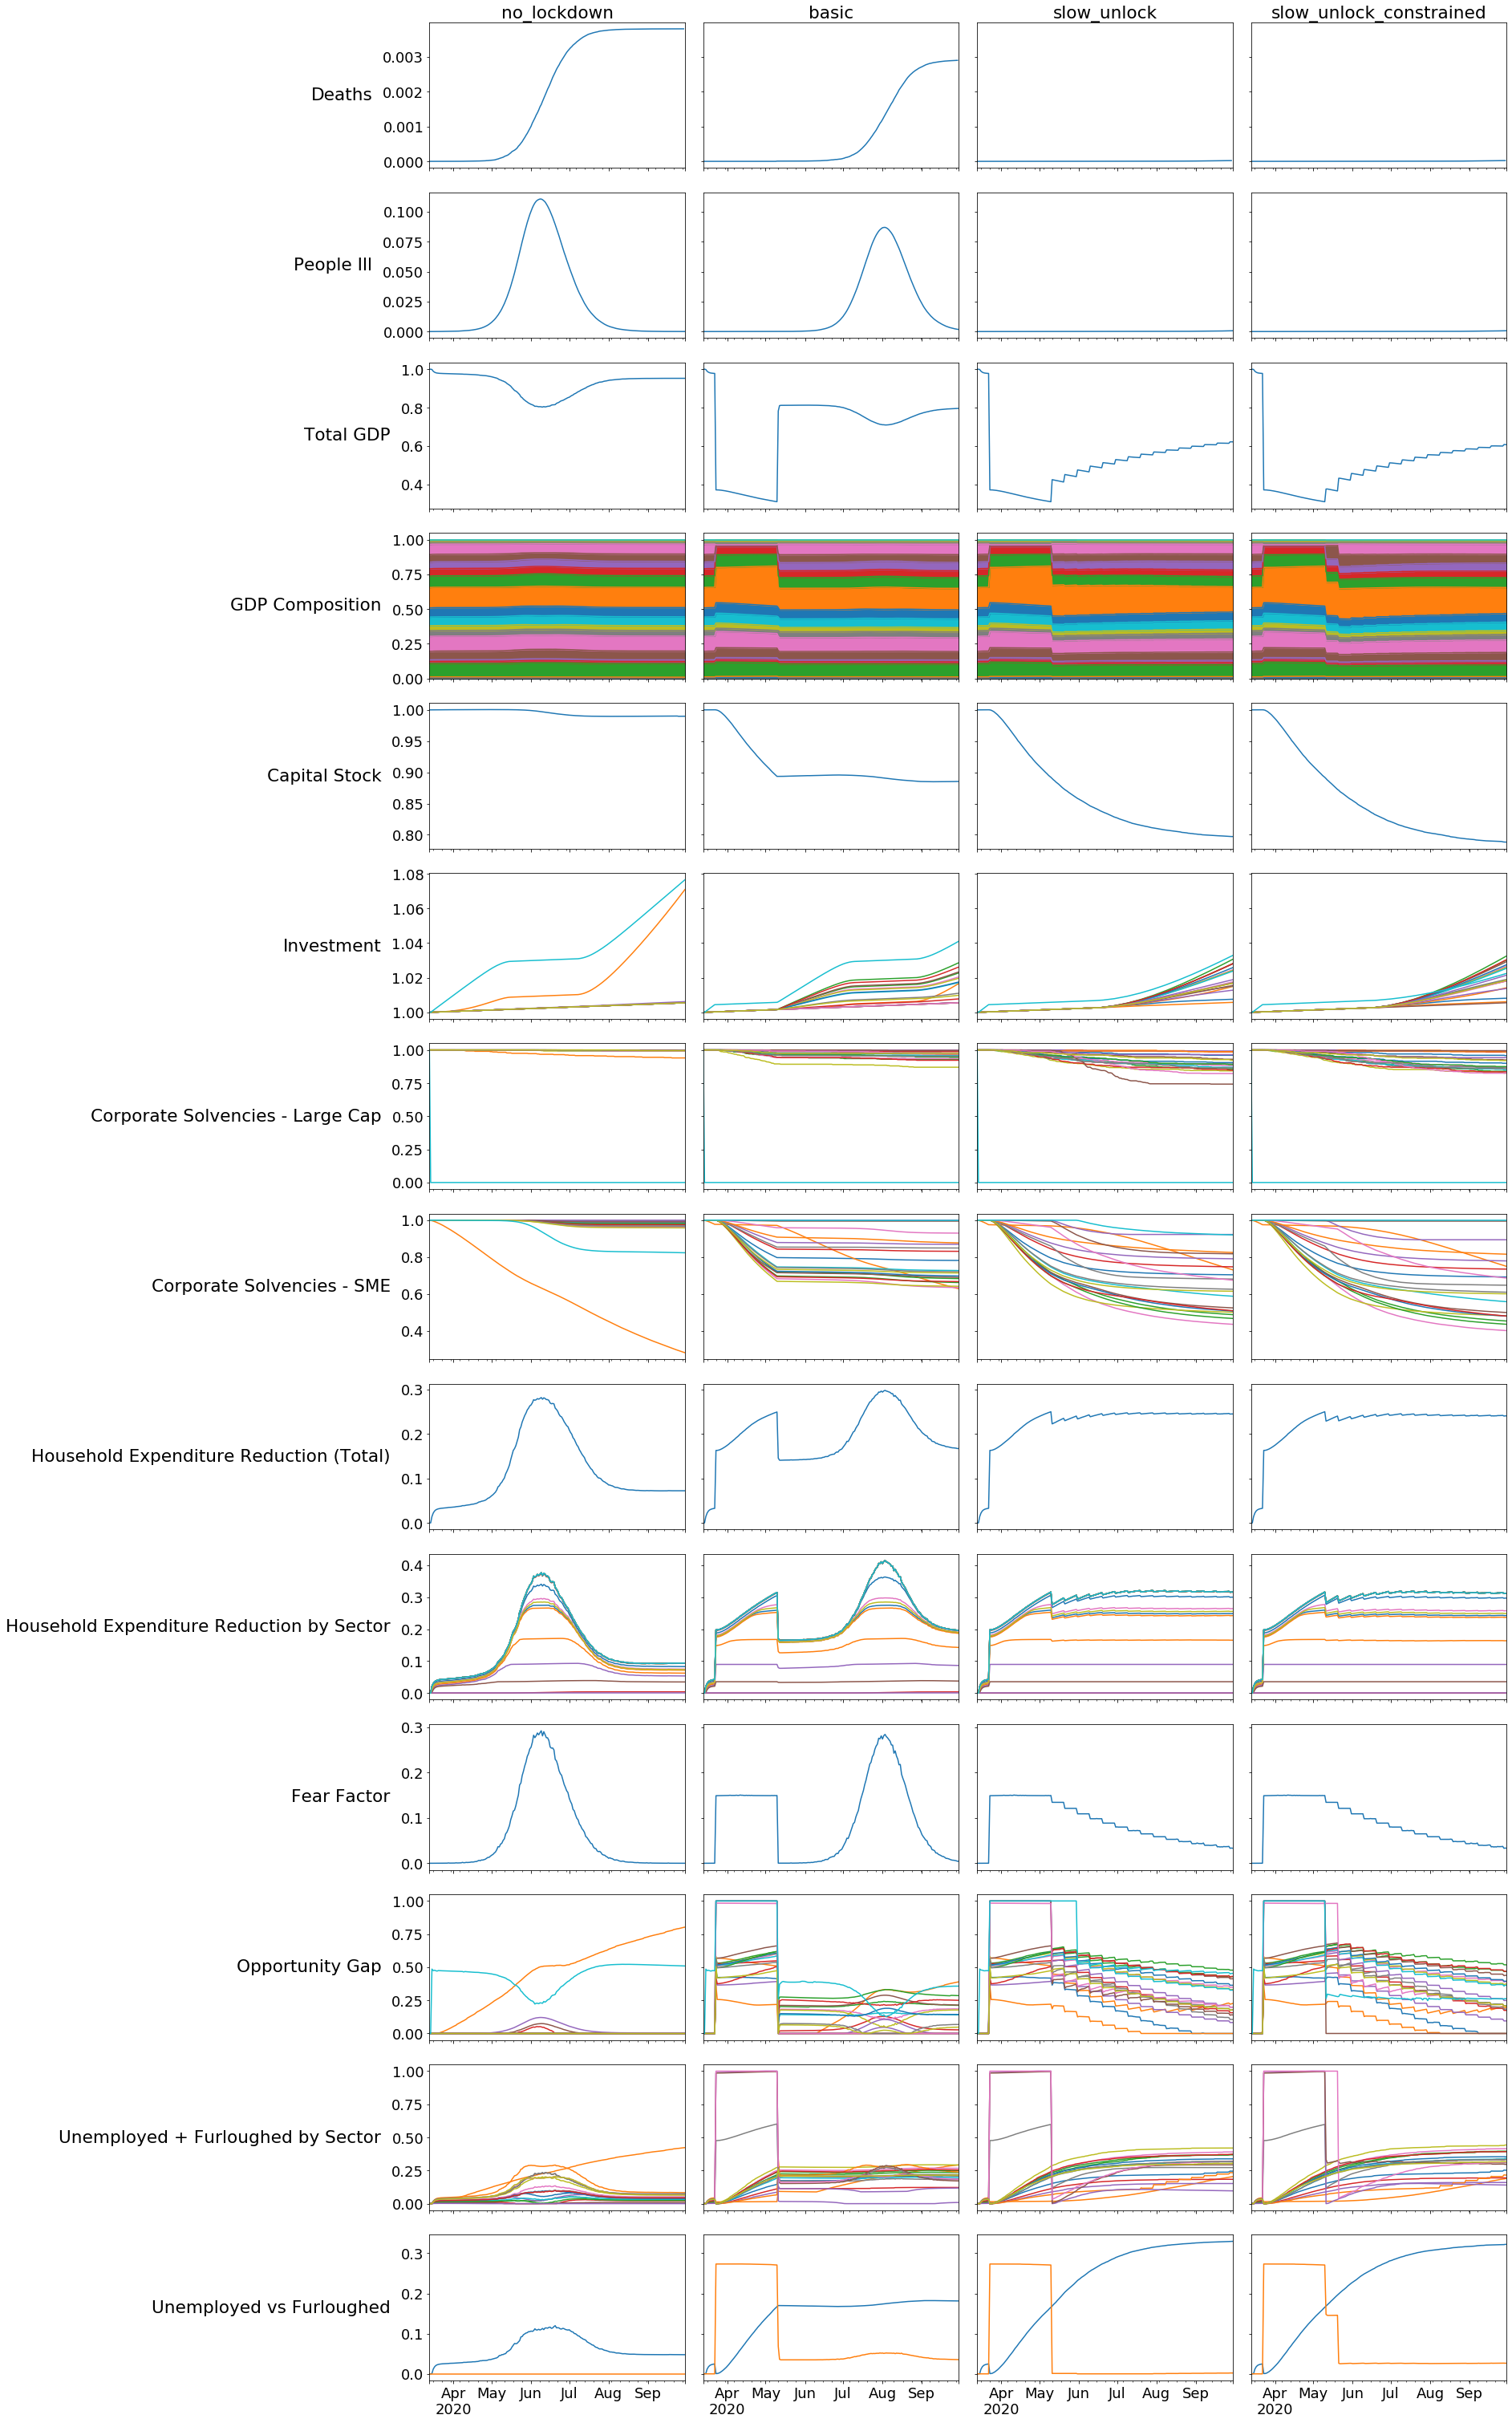

In [13]:
plot_scenarios(summary_dfs,end_time=202)